In [1]:

using PyPlot

In [2]:

f(x) = exp(-x) - x

f (generic function with 1 method)

In [3]:

xmin = -1.0
xmax = 3.0
np = 100
x = range(xmin, xmax, np)
y = f.(x);

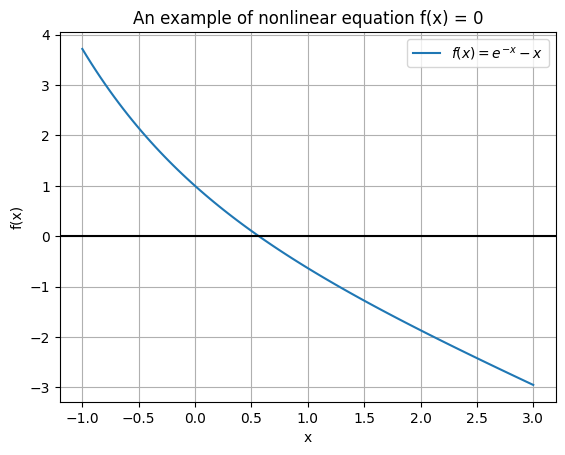

In [4]:

plot(x, y, label=L"f(x) = e^{-x} - x")
axhline(color="black")
grid(true)
xlabel("x")
ylabel("f(x)")
title("An example of nonlinear equation f(x) = 0")
legend();

In [5]:

"""
    rt, ni = mybisection(f, a, b, abstol)

Solve nonlinear equation f(x) = 0 using bisection. a and b are the endpoints of the initial bracketing interval. 
abstol is the acceptble error of the solution.

mybisection() return the approximation for the root of the equation and the number of iterations.
"""
function mybisection(f, a, b, abstol)
    fa = f(a)
    fb = f(b)
    sa = sign(fa)
    sb = sign(fb)
    ni = 0
    while abs(b - a) > abstol
        ni += 1
        m = (b + a) / 2
        fm = f(m)
        sm = sign(fm)
        if sa == sm
            a = m
            sa = sm
        else
            b = m
            sb = sm
        end
    end
    return a, ni
end

mybisection

In [6]:

zb, nb = mybisection(f, 0.0, 1.0, eps()/2)

(0.5671432904097837, 53)

In [7]:
f(zb) ≈ 0.0

false

In [13]:

function mybisection1(f, a, b, abstol)
    fa = f(a)
    fb = f(b)
    sa = sign(fa)
    sb = sign(fb)
    ni = 0
    while abs(b - a) > abstol
        ni += 1
        m = (b + a) / 2
        fm = f(m)
        sm = sign(fm)
        if sb == sm
            b = m
        else
            a = m
        end
    end
    return a, ni
end

mybisection1 (generic function with 1 method)

In [14]:
zb1, = mybisection(f, 0.0, 1.0, eps()/2)

(0.5671432904097837, 53)

In [15]:
f(zb1)≈ 0.0

false

In [16]:
function mybisection2(f, a, b, abstol)
    fa = f(a)
    fb = f(b)
    sa = sign(fa)
    sb = sign(fb)
    ni = 0
    while abs(b - a) > abstol
        ni += 1
        m = (b + a) / 2
        fm = f(m)
        sm = sign(fm)
        if sm == 0
            return m, n1
        elseif sb == sm
            b = m
        else
            a = m
        end
    end
    return a, ni
end

mybisection2 (generic function with 1 method)

In [17]:

"""
    rt, ni = mynewtons(f, fp, xin, abstol, itmax)

Solve nonlinear equation f(x) = 0 using Newton's method. fp(x) = f'(x). xin is initial approximaption of the root. 
abstol is the acceptble error of the solution. itmax is the maximal number of iterations.

mynewtons() return the approximation for the root of the equation and the number of iterations.
"""
function mynewtons(f, fp, xin, abstol, itmax)
    x = xin
    fx = f(x)
    fpx = fp(x)
    delta = -fx / fpx
    ni = 0
    while abs(delta) > abstol
        ni += 1
        if ni > itmax
            break
        end
        x += delta
        fx = f(x)
        fpx = fp(x)
        delta = -fx / fpx
    end
    return x, ni
end

mynewtons

In [18]:

fp(x) = -exp(-x) - 1
xin = 1
itmax = 53

53

In [19]:

zn, nn = mynewtons(f, fp, xin, eps()/2, itmax)

(0.5671432904097838, 4)

In [20]:
f(zn)

0.0

In [22]:
#] add Roots

In [23]:
using Roots

In [24]:
f2(x) = x^5 - x + 1/4

f2 (generic function with 1 method)

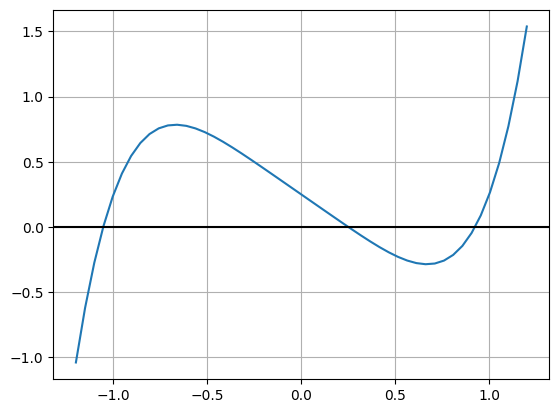

In [25]:
np = 50
s = range(-1.2, 1.2, np)

plot(s, f2.(s))
axhline(color="black")
grid(true)

In [32]:
w1 = find_zero(f2, (-1.2, -1.0), verbose = true);

Results of univariate zero finding:

* Converged to: -1.0546223268842962
* Algorithm: Bisection()
* iterations: 49
* function evaluations ≈ 52
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( -1.0999999999999999, -1 )
(a₁, b₁) = ( -1.0999999999999999, -1.0499999999999998 )
(a₂, b₂) = ( -1.0749999999999997, -1.0499999999999998 )
(a₃, b₃) = ( -1.0624999999999998, -1.0499999999999998 )
(a₄, b₄) = ( -1.0562499999999997, -1.0499999999999998 )
(a₅, b₅) = ( -1.0562499999999997, -1.0531249999999996 )
(a₆, b₆) = ( -1.0546874999999996, -1.0531249999999996 )
(a₇, b₇) = ( -1.0546874999999996, -1.0539062499999996 )
(a₈, b₈) = ( -1.0546874999999996, -1.0542968749999995 )
(a₉, b₉) = ( -1.0546874999999996, -1.0544921874999995 )
(a₁₀, b₁₀) = ( -1.0546874999999996, -1.0545898437499994 )
(a₁₁, b₁₁) = ( -1.0546386718749994, -1.0545898437499994 )
(a₁₂, b₁₂) = ( -1.0546386718749994, -1.0546142578124993 )
(a₁₃, b₁₃) = ( -1.0546264648437493, -1.0546142578124993 )
(a₁₄, b₁₄) = ( -1.

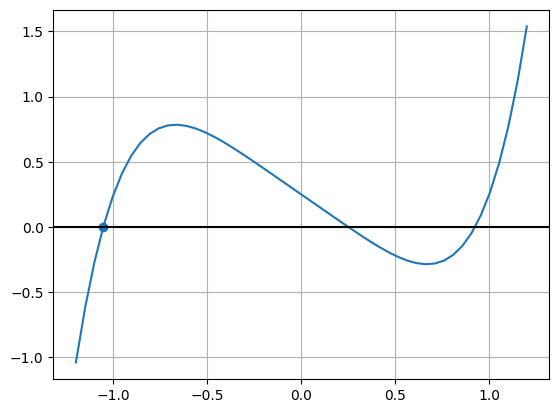

In [33]:
scatter(w1, f2(w1), marker="o")

plot(s, f2.(s))
axhline(color="black")
grid(true)

In [39]:

w2 = find_zero(f2, 0.5, verbose = false)

w3 = find_zero(f2, 1.0, verbose = false)


0.9241759164437068

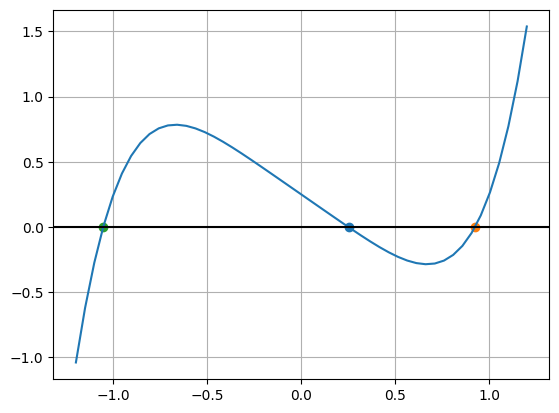

In [41]:
scatter(w2, f2(w2), marker="o")
scatter(w3, f2(w3), marker="o")

scatter(w1, f2(w1), marker="o")
plot(s, f2.(s))
axhline(color="black")
grid(true)

In [44]:
wv = find_zeros(f2, -1.2, 1.2, verbose = false)


3-element Vector{Float64}:
 -1.0546223268842962
  0.2509961747133412
  0.9241759164437068

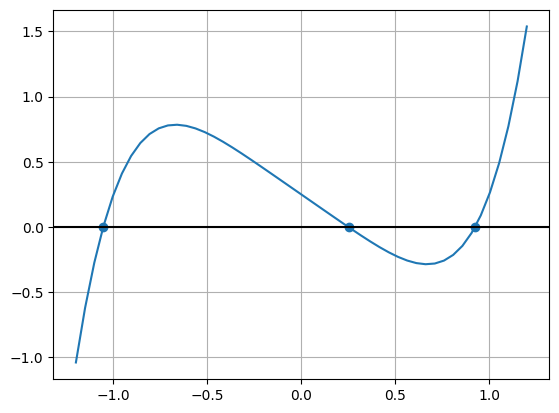

In [45]:
scatter(wv, f2.(wv), marker="o")

plot(s, f2.(s))
axhline(color="black")
grid(true)

In [46]:

f2p(x,p) = x^5 - x + p

f2p (generic function with 1 method)

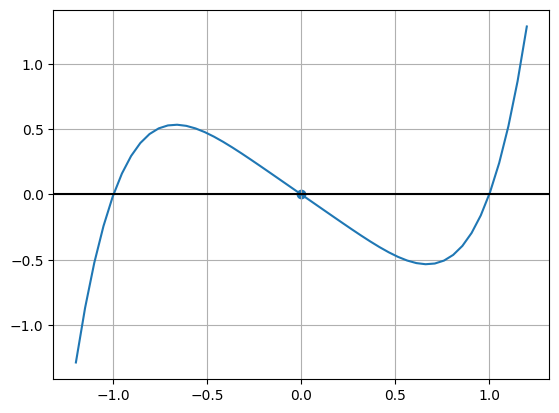

In [50]:
p = 0.0

r = find_zero(f2p, (-1/2, 1/2), p)

plot(s, f2p.(s, p))
scatter(r, f2p(r, p), marker="o")
axhline(color="black")
grid(true)

In [52]:
#] add ForwardDiff

In [53]:
using ForwardDiff

In [54]:
function mynewtons1(f, fp, xin, abstol, itmax)
    x = xin
    fx = f(x)
    fpx = fp(x)
    delta = -fx / fpx
    ni = 0
    while abs(delta) > abstol
        ni += 1
        if ni > itmax
            break
        end
        x += delta
        fx = f(x)
        fpx = ForwardDiff.derivative(f,x)
        delta = -fx / fpx
    end
    return x, ni
end

mynewtons1 (generic function with 1 method)